In [1]:
import tensorflow as tf

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
print(f"The dimension of the tensor train_images is {train_images.ndim}")
print(f"The shape of the tensor train_images is {train_images.shape}")

The dimension of the tensor train_images is 3
The shape of the tensor train_images is (60000, 28, 28)


In [6]:
import matplotlib.pyplot as plt

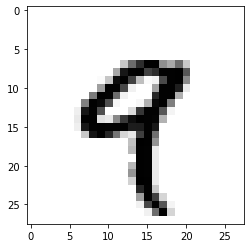

In [7]:
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [11]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype("float32")/255
test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype("float32")/255

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.2553 - accuracy: 0.9266
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1055 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0501 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0375 - accuracy: 0.9888


In [17]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

for i, probability in enumerate(predictions):
    for index, pred_prob in enumerate(probability):
        if pred_prob == max(probability):
            print(f"The predicted label is {index} with probability {pred_prob}")
            print(f"The actual digit is: {test_labels[i]}")

The predicted label is 7 with probability 0.9999837875366211
The actual digit is: 7
The predicted label is 2 with probability 0.9999996423721313
The actual digit is: 2
The predicted label is 1 with probability 0.9986534118652344
The actual digit is: 1
The predicted label is 0 with probability 0.9998774528503418
The actual digit is: 0
The predicted label is 4 with probability 0.9970822930335999
The actual digit is: 4
The predicted label is 1 with probability 0.9999005794525146
The actual digit is: 1
The predicted label is 4 with probability 0.9996263980865479
The actual digit is: 4
The predicted label is 9 with probability 0.99787437915802
The actual digit is: 9
The predicted label is 5 with probability 0.9985833168029785
The actual digit is: 5
The predicted label is 9 with probability 0.9999257326126099
The actual digit is: 9
